<a href="https://colab.research.google.com/github/chunyanwww/my_project/blob/main/california_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scipy
!pip install geopandas
!pip install contextily==1.3.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 41.8 MB/s eta 0:00:00


In [ ]:
import numpy as np  # import numpy
import pandas as pd  # import panda
import seaborn as sns  # import seaborn
import matplotlib.pyplot as plt  # import matplotlib
import scipy.stats as stats  # import scipy
import geopandas as gpd  # import geopandas
import contextily as ctx  # import contextily
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier # import sklearn
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
clf = RandomForestClassifier(n_estimators=10, random_state=0) # save the random forest classifier as clf

raw_data = pd.read_csv("California Housing Dataset.csv") # import dataset

In [ ]:
raw_data.shape

(37141, 10)

In [ ]:
# Print data before pre-processing/data cleaning
raw_data.describe()
print("Initial Data Preview:")
print(raw_data.head())

# Check for null values
print("\nMissing Values:")
print(raw_data.isnull().sum())

# Drop rows with missing/null values (if any)
raw_data.dropna(inplace=True)

# Remove rows with NaN values
raw_data = raw_data[raw_data['MedInc'].notna()]

# Check for duplicates
print("\nDuplicate Rows:")
print(raw_data.duplicated().sum())

# Drop duplicates
raw_data.drop_duplicates(inplace=True)

# Descriptive stats to detect outliers
print("\nSummary Statistics:")
print(raw_data.describe())

# Print cleaned dataset
print("\nCleaned Dataset Preview:")
print(raw_data.head())

Initial Data Preview:
    id  MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  0.0  2.3859      15.0  3.827160   1.112100      1280.0  2.486989     34.60   
1  1.0  3.7188      17.0  6.013373   1.054217      1504.0  3.813084     38.69   
2  2.0  4.7750      27.0  6.535604   1.103175      1061.0  2.464602     34.71   
3  3.0  2.4138      16.0  3.350203   0.965432      1255.0  2.089286     32.66   
4  4.0  3.7500      52.0  4.284404   1.069246      1793.0  1.604790     37.80   

   Longitude  MedHouseVal  
0    -120.12        0.980  
1    -121.22        0.946  
2    -120.45        1.576  
3    -117.09        1.336  
4    -122.41        4.500  

Missing Values:
id             1
MedInc         1
HouseAge       1
AveRooms       1
AveBedrms      1
Population     1
AveOccup       1
Latitude       1
Longitude      1
MedHouseVal    1
dtype: int64

Duplicate Rows:
4

Summary Statistics:
                 id        MedInc      HouseAge      AveRooms     AveBedrms  \
coun

# Q1. How does the age of houses affect their median value? Investigate the relationship betweenHouseAge and MedHouseVal using regression models.


<Axes: >

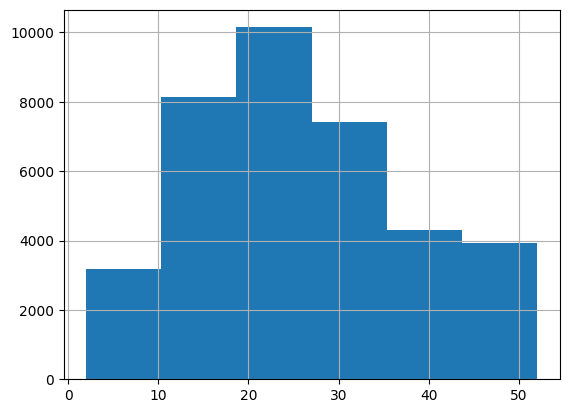

In [ ]:
raw_data["HouseAge"].hist(bins=6)

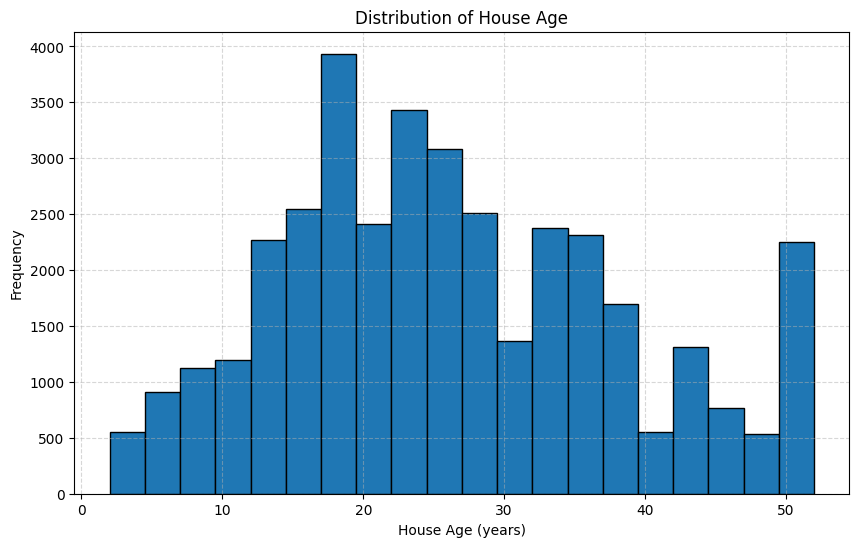

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust figure size
plt.hist(raw_data["HouseAge"], bins=20, edgecolor="black")  # set bins and add edge color
plt.xlabel("House Age (years)")
plt.ylabel("Frequency")
plt.title("Distribution of House Age")
plt.grid(True, linestyle="--", alpha=0.5)  # Add grid
plt.show()

To understand the age distribution of houses in our dataset, we've created this histogram. The x-axis represents the age of the houses in years, while the y-axis shows the frequency, or the number of houses falling within each age range. This visualization helps us identify patterns and trends in the age of the housing stock.

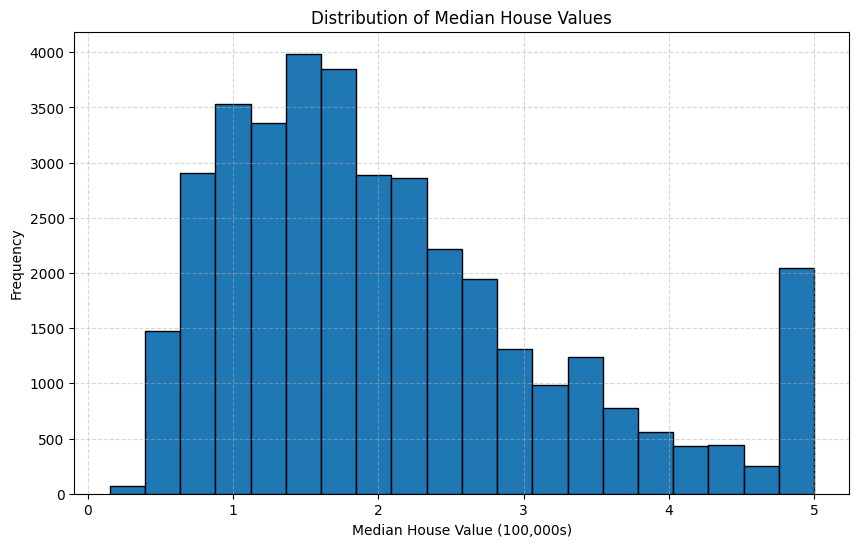

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust the figure size
plt.hist(raw_data["MedHouseVal"], bins=20, edgecolor="black")  # Set the bins and add edge color
plt.xlabel("Median House Value (100,000s)")  # x-axis label
plt.ylabel("Frequency")  # y-axis label
plt.title("Distribution of Median House Values")  # title
plt.grid(True, linestyle="--", alpha=0.5)  # Add grid
plt.show()

To understand the distribution of house prices in our dataset, we've created this histogram. The x-axis represents median house values (in hundreds of thousands of dollars), while the y-axis indicates the frequency, or the number of houses within each price range. This visualization allows us to identify patterns and trends in the housing market.

<Axes: >

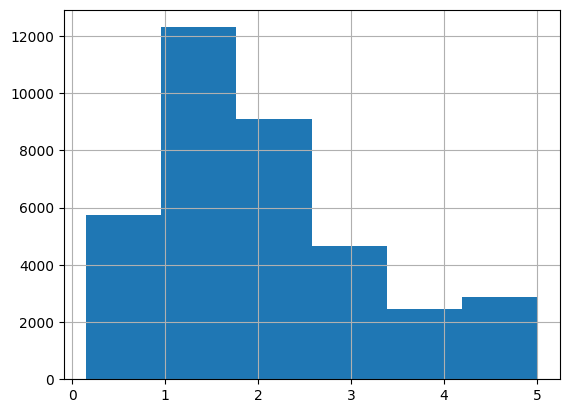

In [ ]:
raw_data["MedHouseVal"].hist(bins=6)

<Axes: xlabel='HouseAge', ylabel='MedHouseVal'>

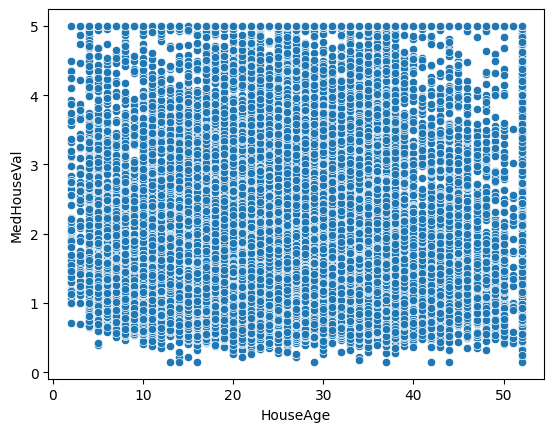

In [ ]:
sns.scatterplot(x="HouseAge", y="MedHouseVal", data=raw_data)

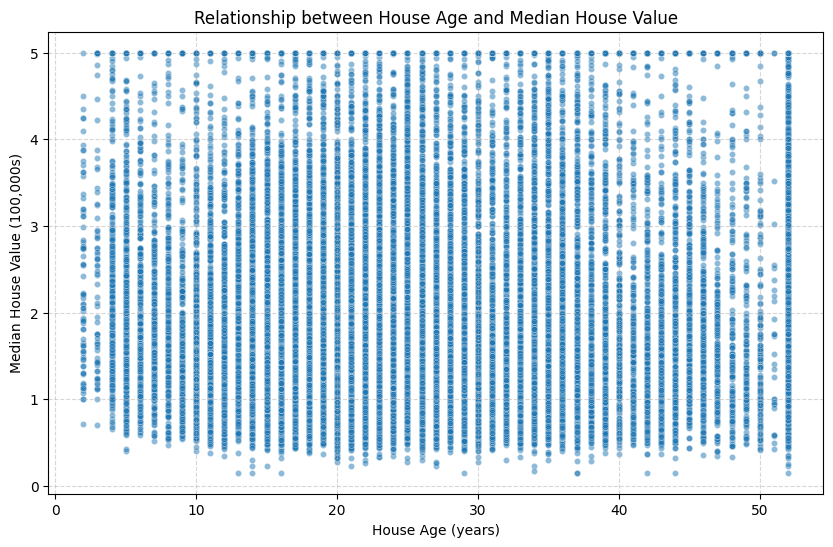

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust figure size for better visibility
sns.scatterplot(x="HouseAge", y="MedHouseVal", data=raw_data, alpha=0.5, s=20)  # Add transparency and adjust marker size
plt.xlabel("House Age (years)")  # Add clear x-axis label
plt.ylabel("Median House Value (100,000s)")  # Add clear y-axis label
plt.title("Relationship between House Age and Median House Value")  # Add descriptive title
plt.grid(True, linestyle="--", alpha=0.5)  # Add a subtle grid
plt.show()

In [ ]:
stats.pearsonr(raw_data["HouseAge"], raw_data["MedHouseVal"])

PearsonRResult(statistic=np.float64(0.10321375073971273), pvalue=np.float64(1.73706841708481e-88))

statistic (0.10321020531323181):
1 indicates a perfect positive linear relationship.
-1 indicates a perfect negative linear relationship.
0 indicates no linear relationship. In this case, the value is approximately 0.103, which suggests a very weak positive linear relationship between 'HouseAge' and 'MedHouseVal'.

pvalue (1.7517226701444063e-88):
This is the p-value associated with the Pearson correlation coefficient. It tests the null hypothesis that there is no linear relationship between the two variables. A low p-value (typically < 0.05) indicates that the observed correlation is statistically significant. In this case, the p-value is extremely small (close to 0), which means the correlation is insignificant, and we can reject the null hypothesis of no linear relationship.

In summary, while there is a very weak positive linear relationship between 'HouseAge' and 'MedHouseVal', the relationship is insignificant due to the extremely low p-value.


<ipython-input-12-a475ed47e3e6>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<Axes: title={'center': 'Linear Regression: HouseAge vs MedHouseVal'}, xlabel='HouseAge', ylabel='MedHouseVal'>

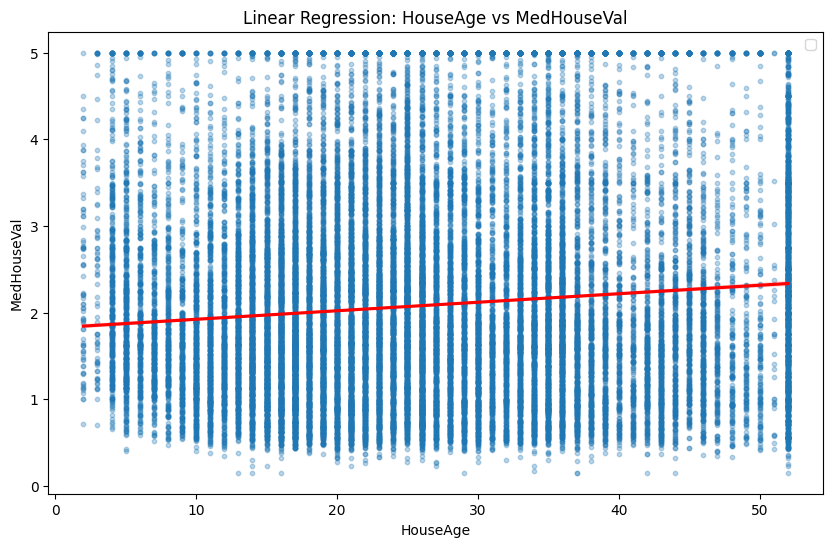

In [ ]:
plt.figure(figsize=(10, 6))
plt.xlabel("HouseAge (years)")
plt.ylabel("MedHouseVal (100,000s dollars)")
plt.title("Linear Regression: HouseAge vs MedHouseVal")
plt.legend()

sns.regplot(
    x="HouseAge",
    y="MedHouseVal",
    data=raw_data,
    scatter_kws={"alpha": 0.3, "s": 10},
    line_kws={"color": "red"},
)

# plt.scatter(raw_data["HouseAge"], raw_data["MedHouseVal"])
# plt.show()

To investigate the relationship between house age and median house value, we've created this scatter plot. Each point represents a housing block, with its age on the x-axis and median house value on the y-axis. The red line represents the linear regression fit, showing the general trend between the two variables.

# Q2. How does geographic location (latitude & longitude) influence house prices? Create heatmaps or geographic visualizations to identify high-value and low-value regions.


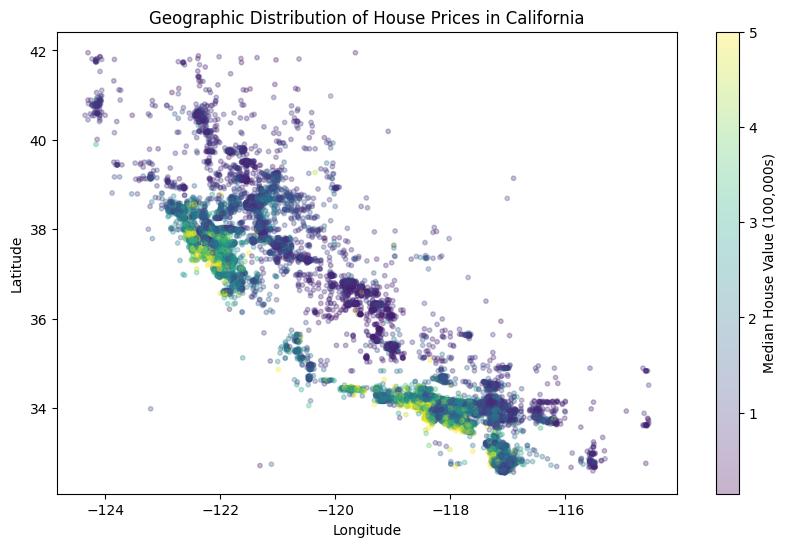

In [ ]:
plt.figure(figsize=(10, 6))
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographic Distribution of House Prices in California")


plt.scatter(
    raw_data["Longitude"],
    raw_data["Latitude"],
    c=raw_data["MedHouseVal"],
    alpha=0.3,
    cmap="viridis",
    s=10,
)

plt.colorbar(label="Median House Value (100,000s)")
plt.show()

This figure shows a geographic scatter plot of the California Housing Dataset, with each point representing a housing block. The horizontal axis indicates longitude and the vertical axis indicates latitude. The color scale (from purple to yellow) denotes the median house value (in hundreds of thousands of dollars) for each block, allowing for a quick visual comparison of property prices across the state. Warmer colors (toward yellow) correspond to higher house values, whereas cooler colors (toward purple) represent lower house values. From this visualization, it becomes evident that certain coastal and urban regions tend to have higher house prices, while more inland or rural areas exhibit comparatively lower prices.


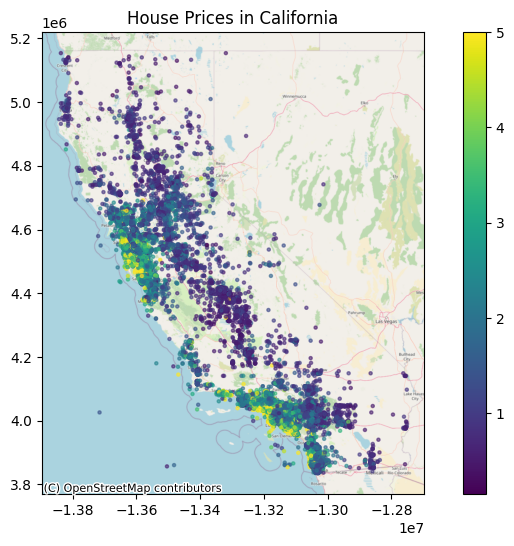

In [ ]:
# Convert DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(
    raw_data, geometry=gpd.points_from_xy(raw_data["Longitude"], raw_data["Latitude"])
)

# Set the initial coordinate reference system (CRS) to WGS84 (EPSG:4326)
gdf.set_crs(epsg=4326, inplace=True)

# Convert to Web Mercator (EPSG:3857) for plotting with contextily
gdf_web_mercator = gdf.to_crs(epsg=3857)

# Create a figure and plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data, coloring points by MedHouseVal
# 'scheme="quantiles"' or other schemes can help color the data more effectively
gdf_web_mercator.plot(
    ax=ax, column="MedHouseVal", cmap="viridis", markersize=5, legend=True, alpha=0.6
)

# Add a basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# (Optional) Adjust plot settings
ax.set_title("House Prices in California")
# ax.set_axis_off()  # Hides axis ticks/labels for a cleaner map

plt.show()

#	Q3. How can median income levels be used to cluster different districts? segment districts based on MedInc and analyze how income levels correlate with housing values.

Summary of Median House Values by Income Cluster:
                   mean  median  count
IncomeCluster                         
High Income    1.484117   1.325  19108
Low Income     3.933638   3.953   3619
Middle Income  2.403952   2.221  14409


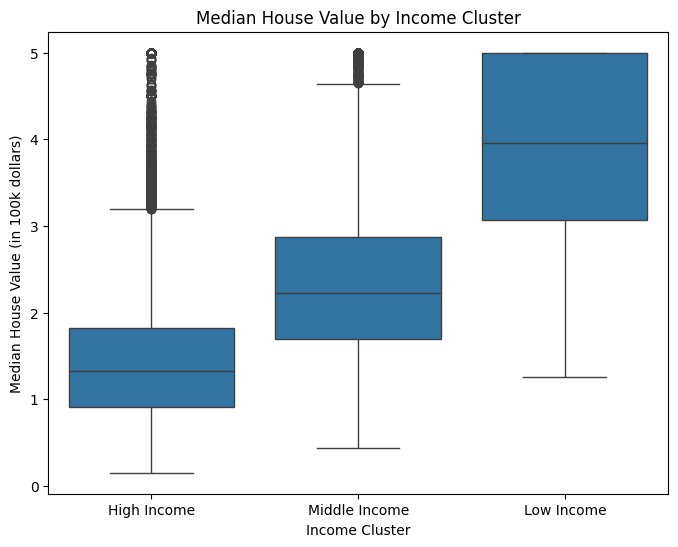

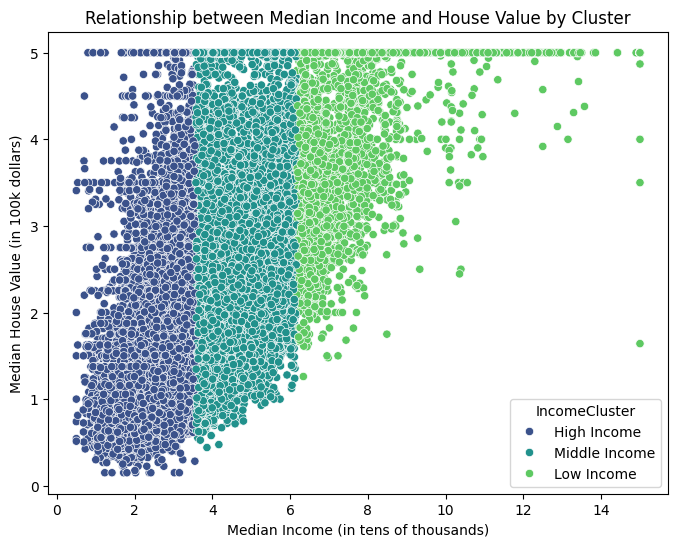

In [ ]:
df = raw_data
X = df[['MedInc']]

# divide cluster into 3 groups (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
df['IncomeCluster'] = kmeans.fit_predict(X)

cluster_name_map = {
    1: "High Income",
    0: "Middle Income",
    2: "Low Income"
}
df['IncomeCluster'] = df['IncomeCluster'].map(cluster_name_map)

# after training the classifier model we can print similar clustering 3 income groups as bar chart
# from matplotlib import pyplot as plt
# import seaborn as sns
# training_observed.groupby('IncomeCluster').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
# plt.gca().spines[['top', 'right',]].set_visible(False)

# Group by the income clusters and compute summary statistics for median house values
cluster_summary = df.groupby('IncomeCluster')['MedHouseVal'].agg(['mean', 'median', 'count'])
print("Summary of Median House Values by Income Cluster:")
print(cluster_summary)

# Visualize the distribution of house values across the income clusters
plt.figure(figsize=(8, 6))
sns.boxplot(x='IncomeCluster', y='MedHouseVal', data=df)
plt.title('Median House Value by Income Cluster')
plt.xlabel('Income Cluster')
plt.ylabel('Median House Value (in 100k dollars)')
plt.show()

# create a scatter plot for between MedInc and MedHouseVal
plt.figure(figsize=(8,6))
sns.scatterplot(x='MedInc', y='MedHouseVal', hue='IncomeCluster', data=df, palette='viridis')
plt.title('Relationship between Median Income and House Value by Cluster')
plt.xlabel('Median Income (in tens of thousands)')
plt.ylabel('Median House Value (in 100k dollars)')
plt.show()

`Conclusion: `
#From this table: the conculsion
1. Cluster 1 has the highest house values on average (mean ≈ 4.26, median ≈ 4.56). Cluster 1 (High Income Group)
2. Cluster 2 has the lowest house values (mean ≈ 1.56, median ≈ 1.29).  Cluster 2 (Low Income Group)
3. Cluster 0 is in between, with a mean of ≈ 2.57 and a median of ≈ 2.40.  Cluster
0 (Middle Income Group)

# Q4. Which regions have the highest housing values based on latitude and longitude? Identify the top 10% most expensive districts and analyze their geographical distribution.

Determine the threshold for the top 10% in terms of median house value (MedHouseVal).

In [ ]:
df = raw_data.copy()
threshold = df["MedHouseVal"].quantile(0.9) #quantile(0.90) returns the value at the 90th percentile of MedHouseVal
df_top10 = df[df["MedHouseVal"] >= threshold]
df_top10

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,IncomeCluster
4,4.0,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.50000,Middle Income
18,18.0,12.4118,18.0,8.863081,1.112082,1288.0,3.050392,34.04,-118.90,5.00001,Low Income
47,47.0,6.8279,18.0,6.883966,1.138493,1410.0,2.596413,37.73,-122.14,4.35100,Low Income
58,58.0,6.4667,8.0,7.060755,1.030468,7775.0,2.572680,37.77,-122.45,4.55000,Low Income
61,61.0,4.3427,45.0,4.831343,1.052265,588.0,1.794952,34.05,-118.39,4.30100,Middle Income
...,...,...,...,...,...,...,...,...,...,...,...
37069,37066.0,10.2311,52.0,8.592308,1.461538,191.0,1.692308,37.79,-122.39,5.00001,Low Income
37073,37070.0,5.0782,52.0,6.366876,1.042553,1155.0,2.488525,37.34,-122.29,3.80800,Middle Income
37109,37106.0,6.1349,25.0,6.549701,1.053582,3176.0,2.201178,37.88,-122.14,4.10800,Middle Income
37113,37110.0,5.0237,38.0,5.793427,1.046948,1050.0,2.486957,34.08,-118.39,4.86400,Middle Income


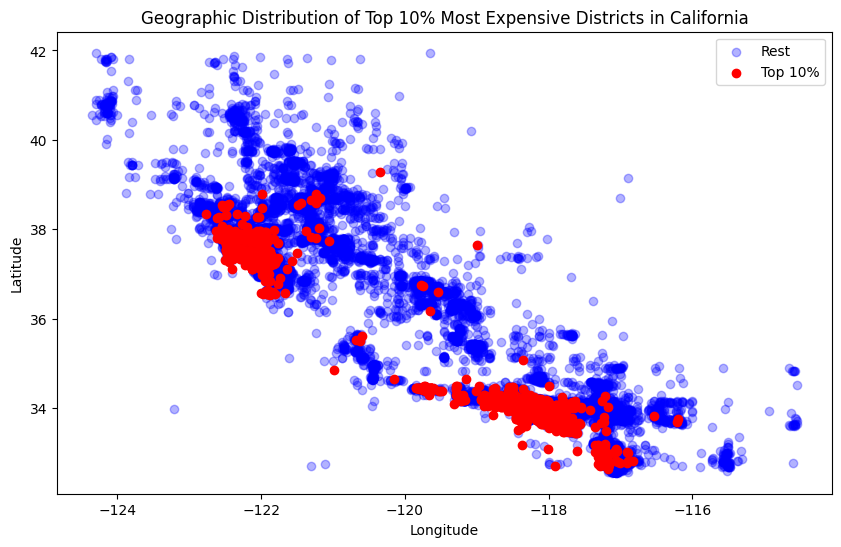

In [ ]:
df_rest = df[df["MedHouseVal"] < threshold]

plt.figure(figsize=(10, 6))
plt.scatter(df_rest["Longitude"], df_rest["Latitude"], color="blue", label="Rest", alpha=0.3)
plt.scatter(df_top10["Longitude"], df_top10["Latitude"], color="red", label="Top 10%")


plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographic Distribution of Top 10% Most Expensive Districts in California")
plt.legend()
plt.show()

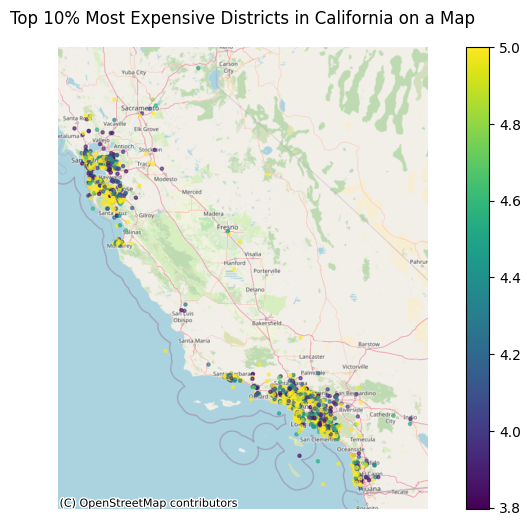

In [ ]:
gdf = gpd.GeoDataFrame(
    df_top10, geometry=gpd.points_from_xy(df_top10["Longitude"], df_top10["Latitude"]), crs="EPSG:4326" # WGS84 lat/lon
)

gdf_web_mercator = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10, 6))

gdf_web_mercator.plot(
    ax=ax, column="MedHouseVal", cmap="viridis", markersize=5, legend=True, alpha=0.6
)

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

ax.set_title("Top 10% Most Expensive Districts in California on a Map")
ax.set_axis_off()

plt.show()

High-Value Threshold: After calculating the 90th percentile of median house value, we have a clear cutoff for what constitutes the top 10%.
Location Clusters: By visualizing the data, we can see if these high-value districts are concentrated in specific geographic regions (e.g., coastal cities, urban centers).
Statistical Profile: Summary statistics for the top 10% reveal typical latitudes and longitudes, and confirm how much higher these values are compared to the rest of the data.

# Q5. How does population density impact housing values?  Compare Population and MedHouseVal. Extremely high population densities might correlate with lower house values due to congestion, whereas moderate-density areas might be more desirable.

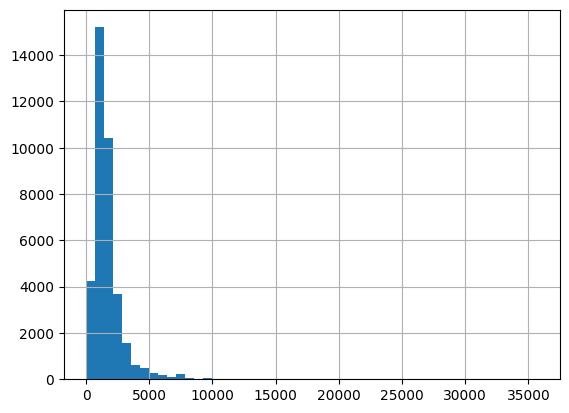

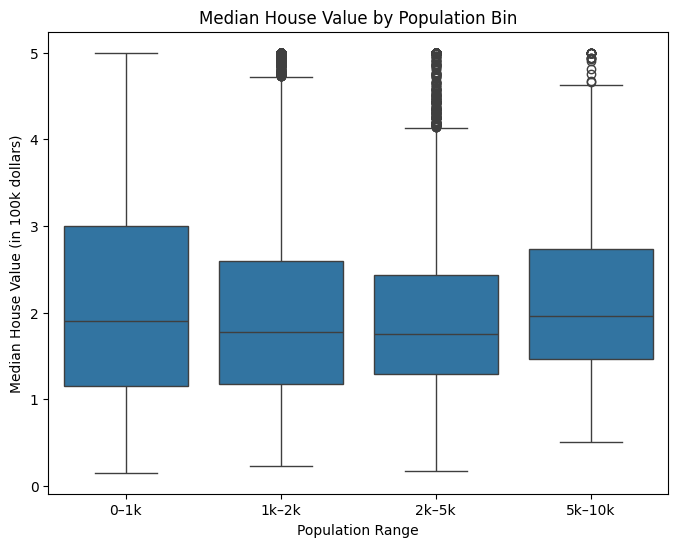

In [ ]:
raw_data['Population'].hist(bins=50)

#considering the population is around 0-10000, try to put population into 4 bins.
bins = [0, 1000, 2000, 5000, 10000]
labels = ['0–1k', '1k–2k', '2k–5k', '5k–10k']

df['PopBin'] = pd.cut(df['Population'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(8, 6))
sns.boxplot(x='PopBin', y='MedHouseVal', data=df)
plt.title('Median House Value by Population Bin')
plt.xlabel('Population Range')
plt.ylabel('Median House Value (in 100k dollars)')
plt.show()


<Axes: >

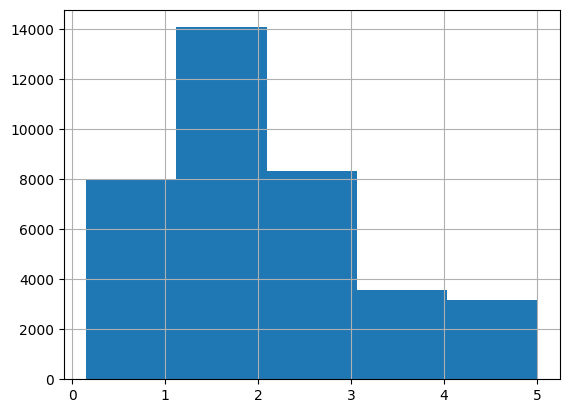

In [ ]:
raw_data['MedHouseVal'].hist(bins=5)

<Axes: xlabel='Population', ylabel='MedHouseVal'>

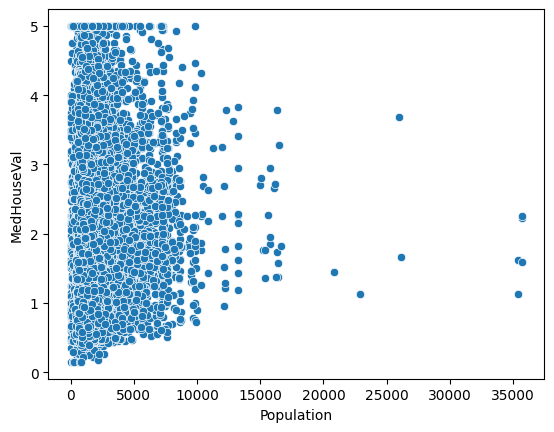

In [ ]:
sns.scatterplot(x = 'Population', y ='MedHouseVal', data=raw_data)

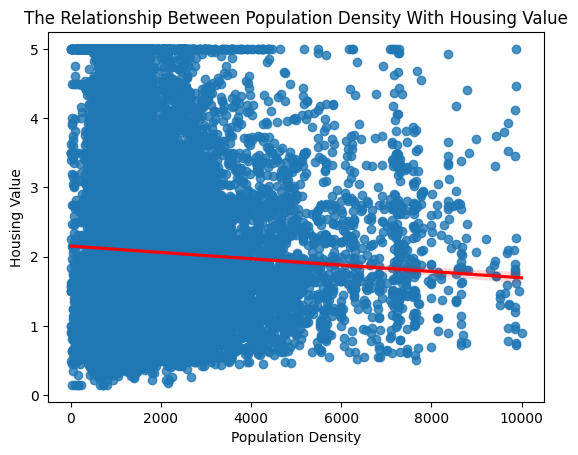

In [ ]:
#change the x axis
population_clean = raw_data[raw_data['Population'] < 10000]

sns.regplot(x = 'Population', y ='MedHouseVal', data=population_clean,line_kws={'color':'red'})
plt.title('The Relationship Between Population Density With Housing Value')
plt.xlabel('Population Density')
plt.ylabel('Housing Value')
plt.title('The Relationship Between Population Density With Housing Value')
plt.show()

In [ ]:
stats.pearsonr(raw_data['Population'],raw_data['MedHouseVal'])

PearsonRResult(statistic=np.float64(-0.03849126207468789), pvalue=np.float64(1.170878765373574e-13))

The statistic value is -0.03, which means popualtion density and housing value have a weak negative relationship with each other(The lower density of the population, the higher of the housing value). However, there must be other parameters that influence the housing price.

In [ ]:
stats.linregress(x=raw_data['Population'], y=raw_data['MedHouseVal'])

LinregressResult(slope=np.float64(-3.4238691740509444e-05), intercept=np.float64(2.1365932920189628), rvalue=np.float64(-0.03849126207468789), pvalue=np.float64(1.1708787653733834e-13), stderr=np.float64(4.61261476867552e-06), intercept_stderr=np.float64(0.009735259375449659))

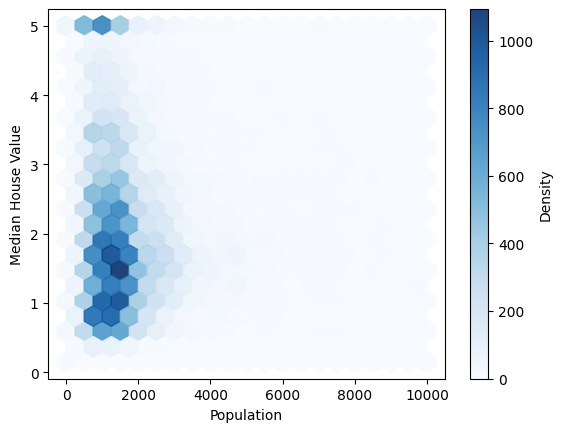

In [ ]:
#since data are too dense to plot each point individually, try using hexbin.
plt.hexbin(population_clean['Population'], population_clean['MedHouseVal'], gridsize=20, cmap='Blues', alpha=0.9)
plt.xlabel('Population')
plt.ylabel('Median House Value')
plt.colorbar(label='Density')
plt.show()

Low population areas (0-2000 people) tend to have a more concentrated distribution of house prices, likely due to the prevalence of single-family homes, with prices clustering around 100k-200k and 500k.
High population areas (2000-10,000 people) show a more scattered price distribution, possibly due to a mix of multi-unit buildings, rental properties, and fewer single-family homes, leading to fewer data points.

In [ ]:
#In the last part, I would use RandomForestClassifier to forcast the housing price and test the accuracy.

In [ ]:
# Define quantiles
low_threshold = raw_data['MedHouseVal'].quantile(0.33)
high_threshold = raw_data['MedHouseVal'].quantile(0.67)

# Put Medium housing values into three categories
raw_data['PriceCategory'] = raw_data['MedHouseVal'].apply(lambda x:
    'Low' if x <= low_threshold else
    'Medium' if x <= high_threshold else
    'High')

print(raw_data['PriceCategory'].value_counts())

PriceCategory
Medium    12631
Low       12259
High      12246
Name: count, dtype: int64


In [ ]:
len(raw_data)

37136

In [ ]:
#Transform categorical values into numerical values
raw_data["PriceCategory"] = raw_data["PriceCategory"].replace({"Low": 0, "Medium": 1, "High": 2})
print(raw_data['PriceCategory'])

0        0
1        0
2        1
3        0
4        2
        ..
37135    1
37136    1
37137    2
37138    1
37139    0
Name: PriceCategory, Length: 37136, dtype: int64


<ipython-input-31-69bd7eedbc6b>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  raw_data["PriceCategory"] = raw_data["PriceCategory"].replace({"Low": 0, "Medium": 1, "High": 2})


In [ ]:
#Split traning and testing dataset(8:2)
train = raw_data[:29709]
test = raw_data[29710:]
print("Train: " + str(len(train)) + " Test: " + str(len(test)))

Train: 29709 Test: 7426


In [ ]:
#At first, I didn’t drop the MedHouseVal column, which caused overfitting (the accuracy score reached 0.99).
#Then I realized that keeping the MedHouseVal column led to data leakage.
#Data leakage occurs when information from the test set is unintentionally used during model training, leading to overly optimistic results.

training_observed = train.drop(['PriceCategory','MedHouseVal'], axis = 1)
training_labels = train['PriceCategory']
training_observed

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,IncomeCluster
0,0.0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,High Income
1,1.0,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,Middle Income
2,2.0,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,Middle Income
3,3.0,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,High Income
4,4.0,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,Middle Income
...,...,...,...,...,...,...,...,...,...,...
29704,29704.0,2.3933,43.0,3.903315,1.121061,1046.0,2.629834,37.78,-122.20,High Income
29705,29705.0,5.3167,29.0,5.407166,1.048069,1472.0,2.555556,37.44,-122.13,Middle Income
29706,29706.0,1.7292,18.0,4.756410,1.103586,1751.0,2.821355,39.11,-122.13,High Income
29707,29707.0,4.1161,37.0,4.162544,1.086817,1005.0,2.104670,37.73,-122.44,Middle Income


In [ ]:
training_labels

,PriceCategory
0,0
1,0
2,1
3,0
4,2
...,...
29704,1
29705,2
29706,0
29707,2


In [ ]:
# fit the training data and the labels to create a classifier called clf
training_observed = pd.get_dummies(training_observed, drop_first=True)

le = LabelEncoder()
training_labels_encoded = le.fit_transform(training_labels)
clf.fit(training_observed, training_labels_encoded)

RandomForestClassifier(n_estimators=10, random_state=0)

In [ ]:
# test data without labels
test_observed = test.drop(['PriceCategory','MedHouseVal'],axis = 1)

In [ ]:
test_observed

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,IncomeCluster
29710,29710.0,3.1062,24.0,3.677758,1.026362,2065.0,2.335810,33.74,-117.86,High Income
29711,29711.0,2.7401,15.0,4.569863,1.032847,1229.0,3.131507,37.37,-121.84,High Income
29712,29712.0,2.3879,17.0,4.535934,1.054381,1597.0,2.150175,38.00,-122.15,High Income
29713,29713.0,3.2757,25.0,4.617711,0.854671,933.0,2.724880,32.76,-117.00,High Income
29714,29714.0,1.7188,43.0,5.281739,1.005747,2195.0,3.055314,38.63,-121.46,High Income
...,...,...,...,...,...,...,...,...,...,...
37135,37132.0,3.3438,50.0,4.936508,1.079365,1775.0,3.022222,34.19,-118.36,High Income
37136,37133.0,3.7308,26.0,5.087533,0.966019,1006.0,4.316901,37.32,-121.86,Middle Income
37137,37134.0,4.1716,52.0,4.678862,1.101485,1156.0,1.431734,37.75,-122.44,Middle Income
37138,37135.0,2.7143,16.0,5.710074,1.068376,584.0,2.803659,38.40,-120.98,High Income


In [ ]:
# ask the classifier (clf) to predict
test_observed_transformed = pd.get_dummies(test_observed, drop_first=True)
test_observed_transformed = test_observed_transformed[training_observed.columns]
preds = clf.predict(test_observed_transformed)
preds

array([2, 1, 0, ..., 2, 0, 0])

In [ ]:
# compare the accuracy of the predicted labels and the actual labels
test_labels = test['PriceCategory']
accuracy_score(preds, test_labels)

0.6910853757069755

In [ ]:
#After removing the column, the accuracy dropped to 0.69, which shows that the predictions were more realistic.
#When making forecasts, it’s important to be mindful of overfitting.
#This issue can be addressed by adjusting the classifier’s parameters, preventing data leakage, and increasing the dataset size.

In [ ]:
#shows the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(preds, test_labels)

array([[1970,  572,   75],
       [ 457, 1485,  648],
       [  56,  486, 1677]])

In [ ]:
#The confusion matrix is a way of visualizing exactly how the results were classified.
#1969, 1447, 1717: These are the correctly classified values.
#It seems that the model struggles the most with distinguishing medium and low house values.